In [1]:
#importing data and retrieving data size has 8 features and 541909 rows
from pandas import read_csv
file_encoding = 'utf8'        # set file_encoding to the file encoding (utf8, latin1, etc.)
ecom = open('data.csv', encoding=file_encoding, errors = 'backslashreplace')
ecom_df=read_csv(ecom)
print(ecom_df.shape)

(541909, 8)


In [2]:
#Finding count of missing data in each column
ecom_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [3]:
#Having a copy of the original data before data cleaning
ecom_df_dp=ecom_df.copy()

In [4]:
ecom_df_dp.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
#ecom_df_dp['CustomerID'] = ecom_df_dp['CustomerID'].fillna(00000)

In [7]:
#ecom_df_dp.isnull().sum()

In [199]:
ecom_df_dp.head(10)

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Amount_Spent,CustomerID,Country,year,month
0,536365,2010-12-01 08:26:00,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850,United Kingdom,2010,12
1,536365,2010-12-01 08:26:00,71053,WHITE METAL LANTERN,6,3.39,20.34,17850,United Kingdom,2010,12
2,536365,2010-12-01 08:26:00,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850,United Kingdom,2010,12
3,536365,2010-12-01 08:26:00,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850,United Kingdom,2010,12
4,536365,2010-12-01 08:26:00,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850,United Kingdom,2010,12
5,536365,2010-12-01 08:26:00,22752,SET 7 BABUSHKA NESTING BOXES,2,7.65,15.30,17850,United Kingdom,2010,12
6,536365,2010-12-01 08:26:00,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,4.25,25.50,17850,United Kingdom,2010,12
7,536366,2010-12-01 08:28:00,22633,HAND WARMER UNION JACK,6,1.85,11.10,17850,United Kingdom,2010,12
8,536366,2010-12-01 08:28:00,22632,HAND WARMER RED POLKA DOT,6,1.85,11.10,17850,United Kingdom,2010,12
9,536367,2010-12-01 08:34:00,84879,ASSORTED COLOUR BIRD ORNAMENT,32,1.69,54.08,13047,United Kingdom,2010,12


In [7]:
ecom_df_dp.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [5]:
ecom_df_dp.dropna(subset=['Description'], inplace = True)

In [6]:
ecom_df_dp.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

In [7]:
sort_StockCode=ecom_df_dp.sort_values('StockCode')
print(sort_StockCode)

       InvoiceNo     StockCode                            Description  \
97459     544634         10002            INFLATABLE POLITICAL GLOBE    
65899     541698         10002            INFLATABLE POLITICAL GLOBE    
76571     542629         10002            INFLATABLE POLITICAL GLOBE    
77513     542735         10002            INFLATABLE POLITICAL GLOBE    
34802     539434         10002            INFLATABLE POLITICAL GLOBE    
15986     537642         10002            INFLATABLE POLITICAL GLOBE    
58741     541262         10002            INFLATABLE POLITICAL GLOBE    
22380     538167         10002            INFLATABLE POLITICAL GLOBE    
21331     538071         10002            INFLATABLE POLITICAL GLOBE    
52498     540798         10002            INFLATABLE POLITICAL GLOBE    
45692     540277         10002            INFLATABLE POLITICAL GLOBE    
36462     539451         10002            INFLATABLE POLITICAL GLOBE    
120160    546649         10002            INFLATABL

In [7]:
#Counting unique products and frequency of purchase
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(15,7))
Stock_Quantity=ecom_df_dp.groupby(['StockCode','Quantity']).count()['Description']
ecom_df_dp.groupby(['StockCode','Quantity']).count()['Description'].plot(ax=ax)
#ecom_df_dp.groupby(['sort_StockCode','Quantity']).count()['InvoiceDate'].hist(cumulative=False)
plt.show()
print('Unique count of StockCode: ',len(Stock_Quantity))
print('Maximum frequency of purchase: ',Stock_Quantity.max())
#print(Stock_Quantity.sort_values())

<Figure size 1500x700 with 1 Axes>

Unique count of StockCode:  44159
Maximum frequency of purchase:  724


In [8]:
#Changing InvoiceDate type to timestamp
import pandas as pd
ecom_df_dp['InvoiceDate']=pd.to_datetime(ecom_df_dp.InvoiceDate,format='%m/%d/%Y %H:%M')
ecom_df_dp.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
ecom_df_dp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      540455 non-null object
StockCode      540455 non-null object
Description    540455 non-null object
Quantity       540455 non-null int64
InvoiceDate    540455 non-null datetime64[ns]
UnitPrice      540455 non-null float64
CustomerID     406829 non-null float64
Country        540455 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.1+ MB


In [9]:
ecom_df_dp.describe().round(2)
#min and max values are outliers

,Quantity,UnitPrice,CustomerID
count,540455.00,540455.00,406829.00
mean,9.60,4.62,15287.69
std,218.01,96.89,1713.60
min,-80995.00,-11062.06,12346.00
25%,1.00,1.25,13953.00
50%,3.00,2.08,15152.00
75%,10.00,4.13,16791.00
max,80995.00,38970.00,18287.00


In [10]:
#removing outliers
ecom_df_dp=ecom_df_dp[ecom_df_dp.Quantity>0]
ecom_df_dp=ecom_df_dp[ecom_df_dp.Quantity<6000]

In [11]:
ecom_df_dp.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,530690.00,530690.00,397921.00
mean,10.29,3.86,15294.32
std,38.80,41.83,1713.17
min,1.00,-11062.06,12347.00
25%,1.00,1.25,13969.00
50%,3.00,2.08,15159.00
75%,10.00,4.13,16795.00
max,4800.00,13541.33,18287.00


In [12]:
#Adding new column Amount_Spent by multiplying unit price with the quantities bought for each row
ecom_df_dp['Amount_Spent']=ecom_df_dp['Quantity']*ecom_df_dp['UnitPrice']

In [15]:
ecom_df_dp['Amount_Spent']=ecom_df_dp['Quantity']*ecom_df_dp['UnitPrice']
ecom_df_dp.loc[:,['Amount_Spent']]

,Amount_Spent
0,15.30
1,20.34
2,22.00
3,20.34
4,20.34
5,15.30
6,25.50
7,11.10
8,11.10
9,54.08


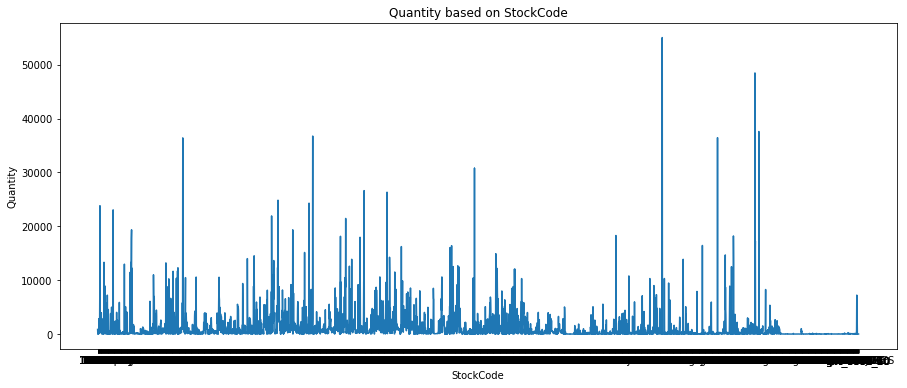

In [73]:
#For each product code quantity of purchase
Quantity_StockCode = ecom_df_dp.groupby(by=['StockCode','Description'], as_index=False)['Quantity'].sum()

plt.subplots(figsize=(15,6))
plt.plot(Quantity_StockCode.StockCode, Quantity_StockCode.Quantity)
plt.xlabel('StockCode')
plt.ylabel('Quantity')
plt.title('Quantity based on StockCode')
plt.show()

In [ ]:
#Get unique stock code and quantity purchased for each stock code
Unique_StockCode_dict = {}
TotalQuantity = {}
for val in ecom_df_dp['StockCode']:
    Unique_StockCode_dict[val] = 1
for code in Unique_StockCode_dict:
    tot_quantity = ecom_df_dp.loc[ecom_df_dp['StockCode'] == code]['Quantity'].sum()
    TotalQuantity[code] = tot_quantity

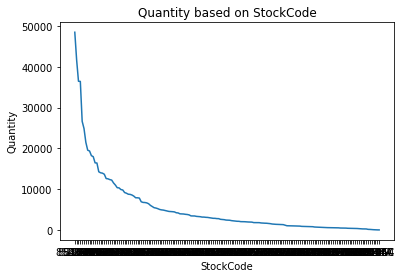

In [93]:
#Sort and plot
SortedTotalQuantity = sorted(TotalQuantity.items(), key=lambda x:x[1], reverse=True)
x_val = [x[0] for x in SortedTotalQuantity]
y_val = [x[1] for x in SortedTotalQuantity]
plt.plot(x_val, y_val)
plt.xlabel('StockCode')
plt.ylabel('Quantity')
plt.title('Quantity based on StockCode')
plt.show()

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


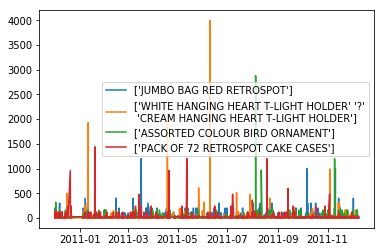

In [104]:
Most_popular_5 = SortedTotalQuantity[0:4]
Least_popular_5 = SortedTotalQuantity[len(SortedTotalQuantity)-5 : len(SortedTotalQuantity)]
#print(Most_popular_5)
#print(Least_popular_5)
#time series for quantity purchased for top 5 popular products
for item in Most_popular_5:
    Prod = item[0]
    x_val = ecom_df_dp.loc[ecom_df_dp['StockCode'] == Prod]['InvoiceDate']
    y_val = ecom_df_dp.loc[ecom_df_dp['StockCode'] == Prod]['Quantity']
    descr = ecom_df_dp.loc[ecom_df_dp['StockCode'] == Prod]['Description'].unique()
    print(type(descr))
    plt.plot(x_val, y_val, label=descr)
plt.legend()
plt.show()

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


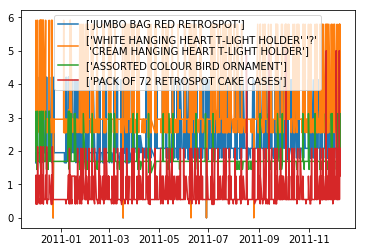

In [105]:
#time series for unit price change for top 5 popular products
for item in Most_popular_5:
    Prod = item[0]
    x_val = ecom_df_dp.loc[ecom_df_dp['StockCode'] == Prod]['InvoiceDate']
    y_val = ecom_df_dp.loc[ecom_df_dp['StockCode'] == Prod]['UnitPrice']
    descr = ecom_df_dp.loc[ecom_df_dp['StockCode'] == Prod]['Description'].unique()
    print(type(descr))
    plt.plot(x_val, y_val, label=descr)
plt.legend()
plt.show()

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


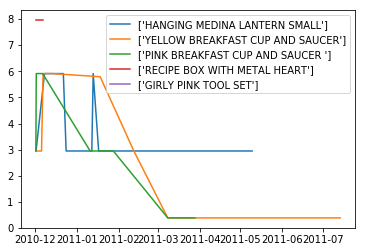

In [106]:
#time series for unit price change for least 5 popular products
for item in Least_popular_5:
    Prod = item[0]
    x_val = ecom_df_dp.loc[ecom_df_dp['StockCode'] == Prod]['InvoiceDate']
    y_val = ecom_df_dp.loc[ecom_df_dp['StockCode'] == Prod]['UnitPrice']
    descr = ecom_df_dp.loc[ecom_df_dp['StockCode'] == Prod]['Description'].unique()
    print(type(descr))
    plt.plot(x_val, y_val, label=descr)
plt.legend()
plt.show()

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


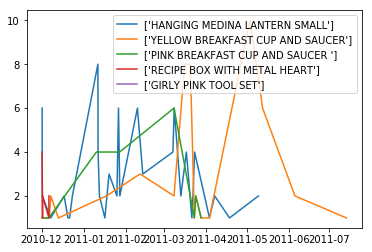

In [107]:
#time series for quantity purchased for least 5 popular products
for item in Least_popular_5:
    Prod = item[0]
    x_val = ecom_df_dp.loc[ecom_df_dp['StockCode'] == Prod]['InvoiceDate']
    y_val = ecom_df_dp.loc[ecom_df_dp['StockCode'] == Prod]['Quantity']
    descr = ecom_df_dp.loc[ecom_df_dp['StockCode'] == Prod]['Description'].unique()
    print(type(descr))
    plt.plot(x_val, y_val, label=descr)
plt.legend()
plt.show()

In [13]:
#Rearranging columns
ecom_df_dp = ecom_df_dp[['InvoiceNo','InvoiceDate','StockCode','Description','Quantity','UnitPrice','Amount_Spent','CustomerID','Country']]

In [14]:
ecom_df_dp.head()

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Amount_Spent,CustomerID,Country
0,536365,2010-12-01 08:26:00,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850.0,United Kingdom
1,536365,2010-12-01 08:26:00,71053,WHITE METAL LANTERN,6,3.39,20.34,17850.0,United Kingdom
2,536365,2010-12-01 08:26:00,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850.0,United Kingdom
3,536365,2010-12-01 08:26:00,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850.0,United Kingdom
4,536365,2010-12-01 08:26:00,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850.0,United Kingdom


In [15]:
#ecom_df_dp= ecom_df_dp[ecom_df_dp.CustomerID != 0]

In [16]:
#get frequency of purchase by customer
ecom_df_dp.groupby(by=['CustomerID','Country'],as_index='FALSE')['InvoiceNo'].count()

CustomerID  Country       
12347.0     Iceland           182
12348.0     Finland            31
12349.0     Italy              73
12350.0     Norway             17
12352.0     Norway             85
12353.0     Bahrain             4
12354.0     Spain              58
12355.0     Bahrain            13
12356.0     Portugal           59
12357.0     Switzerland       131
12358.0     Austria            19
12359.0     Cyprus            248
12360.0     Austria           129
12361.0     Belgium            10
12362.0     Belgium           266
12363.0     Unspecified        23
12364.0     Belgium            85
12365.0     Cyprus             22
12367.0     Denmark            11
12370.0     Austria             8
            Cyprus            159
12371.0     Switzerland        63
12372.0     Denmark            52
12373.0     Austria            14
12374.0     Austria            33
12375.0     Finland            17
12377.0     Switzerland        77
12378.0     Switzerland       219
12379.0     Belgium  

In [17]:
check=ecom_df_dp['CustomerID'].isin(["00000"])
ecom_df_dp[check]

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Amount_Spent,CustomerID,Country


In [18]:
orders = ecom_df_dp.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

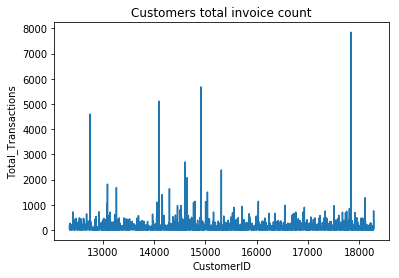

In [19]:
#plot Customer ID and total transactions
import matplotlib.pyplot as plt
#orders.sort_values(['InvoiceNo'], ascending=[False])
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('CustomerID')
plt.ylabel('Total_Transactions')
plt.title('Customer''s total invoice count')
plt.show()

In [20]:
orders.sort_values(by='InvoiceNo', ascending=False).head(100)

,CustomerID,Country,InvoiceNo
4017,17841.0,United Kingdom,7847
1886,14911.0,EIRE,5677
1296,14096.0,United Kingdom,5111
333,12748.0,United Kingdom,4596
1668,14606.0,United Kingdom,2700
2183,15311.0,United Kingdom,2379
1696,14646.0,Netherlands,2080
569,13089.0,United Kingdom,1818
697,13263.0,United Kingdom,1677
1441,14298.0,United Kingdom,1637


In [21]:
orders['InvoiceNo'].describe().round(2)

count    4345.00
mean       91.58
std       228.64
min         1.00
25%        17.00
50%        41.00
75%       100.00
max      7847.00
Name: InvoiceNo, dtype: float64

In [22]:
Top_orders=orders[orders['InvoiceNo']>100]
Top_orders['Country'].describe()

count               1080
unique                26
top       United Kingdom
freq                 971
Name: Country, dtype: object

In [23]:
top_cust=ecom_df_dp[ecom_df_dp['CustomerID']==17841]

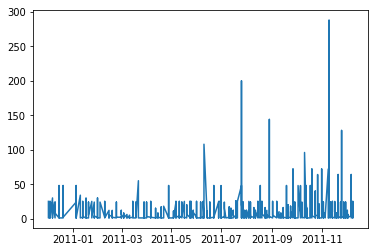

In [24]:
top_cust=ecom_df_dp[ecom_df_dp['CustomerID']==17841]
plt.plot(top_cust['InvoiceDate'],top_cust['Quantity'])
plt.show()

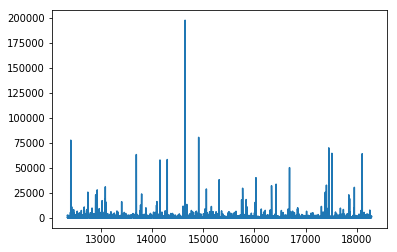

In [25]:
Quantity_Each_Customer = ecom_df_dp.groupby(by=['CustomerID','Country'], as_index=False)['Quantity'].sum()
plt.plot(Quantity_Each_Customer.CustomerID, Quantity_Each_Customer.Quantity)

In [26]:
top_cust[top_cust['Quantity']>100]['Description']

221431                   GUMBALL COAT RACK
277498          POPART WOODEN PENCILS ASST
315623     DISCO BALL CHRISTMAS DECORATION
451888     DISCO BALL CHRISTMAS DECORATION
499593    HEART DECORATION RUSTIC HANGING 
Name: Description, dtype: object

In [27]:
ecom_df_dp.isnull().sum()

InvoiceNo            0
InvoiceDate          0
StockCode            0
Description          0
Quantity             0
UnitPrice            0
Amount_Spent         0
CustomerID      132769
Country              0
dtype: int64

In [28]:
ecom_df_dp.head()

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Amount_Spent,CustomerID,Country
0,536365,2010-12-01 08:26:00,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850.0,United Kingdom
1,536365,2010-12-01 08:26:00,71053,WHITE METAL LANTERN,6,3.39,20.34,17850.0,United Kingdom
2,536365,2010-12-01 08:26:00,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850.0,United Kingdom
3,536365,2010-12-01 08:26:00,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850.0,United Kingdom
4,536365,2010-12-01 08:26:00,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850.0,United Kingdom


In [29]:
ecom_df_dp["CustomerID"] = pd.to_numeric(ecom_df_dp["CustomerID"])

In [34]:
ecom_df_dp.head()

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Amount_Spent,CustomerID,Country
0,536365,2010-12-01 08:26:00,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850.0,United Kingdom
1,536365,2010-12-01 08:26:00,71053,WHITE METAL LANTERN,6,3.39,20.34,17850.0,United Kingdom
2,536365,2010-12-01 08:26:00,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850.0,United Kingdom
3,536365,2010-12-01 08:26:00,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850.0,United Kingdom
4,536365,2010-12-01 08:26:00,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850.0,United Kingdom


In [30]:
ecom_df_dp.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,530690.0,10.289781,38.800634,1.00,1.00,3.00,10.00,4800.00
UnitPrice,530690.0,3.861615,41.833280,-11062.06,1.25,2.08,4.13,13541.33
Amount_Spent,530690.0,19.595069,93.737212,-11062.06,3.75,9.90,17.70,38970.00
CustomerID,397921.0,15294.324808,1713.165940,12347.00,13969.00,15159.00,16795.00,18287.00


C:\Users\laksh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\laksh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Quantity / UnitPrice')

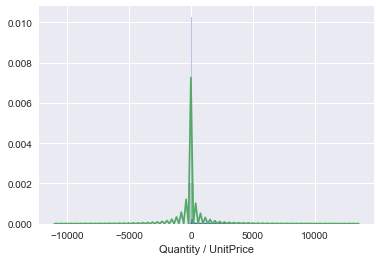

In [31]:
import seaborn as sns; sns.set()
plot_income = sns.distplot(ecom_df_dp["Quantity"])
plot_spend = sns.distplot(ecom_df_dp["UnitPrice"])
plt.xlabel('Quantity / UnitPrice')

In [31]:
ecom_df_dp = ecom_df_dp.dropna()

In [32]:
ecom_df_dp.isnull().sum().sort_values(ascending=False)
ecom_df_dp.shape

(397921, 9)

In [33]:
ecom_df_dp['CustomerID'] = ecom_df_dp['CustomerID'].astype('int64')

In [34]:
ecom_df_dp.head()

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Amount_Spent,CustomerID,Country
0,536365,2010-12-01 08:26:00,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,71053,WHITE METAL LANTERN,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850,United Kingdom


In [35]:
ecom_df_dp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397921 entries, 0 to 541908
Data columns (total 9 columns):
InvoiceNo       397921 non-null object
InvoiceDate     397921 non-null datetime64[ns]
StockCode       397921 non-null object
Description     397921 non-null object
Quantity        397921 non-null int64
UnitPrice       397921 non-null float64
Amount_Spent    397921 non-null float64
CustomerID      397921 non-null int64
Country         397921 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 30.4+ MB


In [36]:
ecom_df_dp.count()

InvoiceNo       397921
InvoiceDate     397921
StockCode       397921
Description     397921
Quantity        397921
UnitPrice       397921
Amount_Spent    397921
CustomerID      397921
Country         397921
dtype: int64

In [37]:
neg_val=0
for quantity in ecom_df_dp["Quantity"]:
    if quantity<0:
        neg_val+=1
print(neg_val)

0


In [38]:
ecom_df_dp.describe().round(2)

,Quantity,UnitPrice,Amount_Spent,CustomerID
count,397921.00,397921.00,397921.00,397921.00
mean,12.60,3.12,21.78,15294.32
std,42.89,22.10,96.16,1713.17
min,1.00,0.00,0.00,12347.00
25%,2.00,1.25,4.68,13969.00
50%,6.00,1.95,11.80,15159.00
75%,12.00,3.75,19.80,16795.00
max,4800.00,8142.75,38970.00,18287.00


In [39]:
ecom_df_dp.Description.unique()
ecom_df_dp.Description.count()

397921

In [40]:
ecom_df_dp.Description.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2028
REGENCY CAKESTAND 3 TIER               1724
JUMBO BAG RED RETROSPOT                1618
ASSORTED COLOUR BIRD ORNAMENT          1408
PARTY BUNTING                          1397
LUNCH BAG RED RETROSPOT                1316
SET OF 3 CAKE TINS PANTRY DESIGN       1159
LUNCH BAG  BLACK SKULL.                1105
POSTAGE                                1099
PACK OF 72 RETROSPOT CAKE CASES        1068
PAPER CHAIN KIT 50'S CHRISTMAS         1019
SPOTTY BUNTING                         1017
LUNCH BAG SPACEBOY DESIGN              1008
LUNCH BAG CARS BLUE                     989
HEART OF WICKER SMALL                   985
NATURAL SLATE HEART CHALKBOARD          980
LUNCH BAG PINK POLKADOT                 957
REX CASH+CARRY JUMBO SHOPPER            952
LUNCH BAG SUKI DESIGN                   933
ALARM CLOCK BAKELIKE RED                899
LUNCH BAG APPLE DESIGN                  895
SET OF 4 PANTRY JELLY MOULDS            893
JUMBO BAG PINK POLKADOT         

In [41]:
#Adding 2 columns with year and month from invoice date
ecom_df_dp['year'], ecom_df_dp['month'] = ecom_df_dp['InvoiceDate'].dt.year, ecom_df_dp['InvoiceDate'].dt.month
ecom_df_dp

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Amount_Spent,CustomerID,Country,year,month
0,536365,2010-12-01 08:26:00,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850,United Kingdom,2010,12
1,536365,2010-12-01 08:26:00,71053,WHITE METAL LANTERN,6,3.39,20.34,17850,United Kingdom,2010,12
2,536365,2010-12-01 08:26:00,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850,United Kingdom,2010,12
3,536365,2010-12-01 08:26:00,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850,United Kingdom,2010,12
4,536365,2010-12-01 08:26:00,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850,United Kingdom,2010,12
5,536365,2010-12-01 08:26:00,22752,SET 7 BABUSHKA NESTING BOXES,2,7.65,15.30,17850,United Kingdom,2010,12
6,536365,2010-12-01 08:26:00,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,4.25,25.50,17850,United Kingdom,2010,12
7,536366,2010-12-01 08:28:00,22633,HAND WARMER UNION JACK,6,1.85,11.10,17850,United Kingdom,2010,12
8,536366,2010-12-01 08:28:00,22632,HAND WARMER RED POLKA DOT,6,1.85,11.10,17850,United Kingdom,2010,12
9,536367,2010-12-01 08:34:00,84879,ASSORTED COLOUR BIRD ORNAMENT,32,1.69,54.08,13047,United Kingdom,2010,12


In [42]:
free_count=0
for freebies in ecom_df_dp["UnitPrice"]:
    if freebies==0:
        free_count+=1
print(free_count)

39


In [43]:
ecom_df_dp.to_csv('ecommerce_data_processed.csv')

In [44]:
ecom_free = ecom_df_dp[ecom_df_dp.UnitPrice == 0]
ecom_free

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Amount_Spent,CustomerID,Country,year,month
9302,537197,2010-12-05 14:02:00,22841,ROUND CAKE TIN VINTAGE GREEN,1,0.0,0.0,12647,Germany,2010,12
33576,539263,2010-12-16 14:36:00,22580,ADVENT CALENDAR GINGHAM SACK,4,0.0,0.0,16560,United Kingdom,2010,12
40089,539722,2010-12-21 13:45:00,22423,REGENCY CAKESTAND 3 TIER,10,0.0,0.0,14911,EIRE,2010,12
47068,540372,2011-01-06 16:41:00,22090,PAPER BUNTING RETROSPOT,24,0.0,0.0,13081,United Kingdom,2011,1
47070,540372,2011-01-06 16:41:00,22553,PLASTERS IN TIN SKULLS,24,0.0,0.0,13081,United Kingdom,2011,1
56674,541109,2011-01-13 15:10:00,22168,ORGANISER WOOD ANTIQUE WHITE,1,0.0,0.0,15107,United Kingdom,2011,1
86789,543599,2011-02-10 13:08:00,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,0.0,0.0,17560,United Kingdom,2011,2
130188,547417,2011-03-23 10:25:00,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,0.0,0.0,13239,United Kingdom,2011,3
139453,548318,2011-03-30 12:45:00,22055,MINI CAKE STAND HANGING STRAWBERY,5,0.0,0.0,13113,United Kingdom,2011,3
145208,548871,2011-04-04 14:42:00,22162,HEART GARLAND RUSTIC PADDED,2,0.0,0.0,14410,United Kingdom,2011,4


In [45]:
stockcode_22841_count=0
for stockcode_22841 in ecom_free["StockCode"]:
    if stockcode_22841=="22580":
        stockcode_22841_count+=1
print(stockcode_22841_count)

1


In [46]:
unique_desc=ecom_df_dp["Description"].nunique()
print(unique_desc)

3876


In [47]:
unique_country=ecom_df_dp["Country"].nunique()
print(unique_country)

37


In [48]:
country_count_df=ecom_df_dp.Country.value_counts()
type(country_count_df)

pandas.core.series.Series

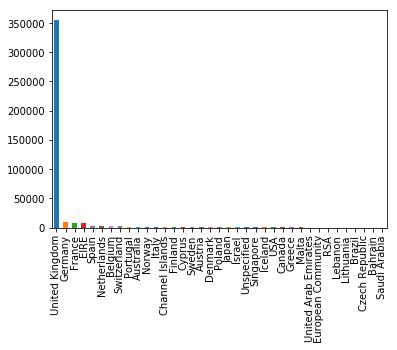

In [49]:
ecom_df_dp["Country"].value_counts().plot.bar()

In [50]:
ecom_df_dp['year'] = ecom_df_dp['year'].astype('int64')
ecom_df_dp['month'] = ecom_df_dp['month'].astype('int64')

In [51]:
ecom_df_dp.head()
indices = list(np.where(ecom_df_dp["Description"]=='WHITE HANGING HEART T-LIGHT HOLDER')[0])
print(indices)

[0, 49, 66, 218, 253, 269, 355, 407, 925, 968, 1429, 1739, 1751, 1840, 1902, 1952, 1976, 2021, 2025, 2057, 2256, 2274, 2627, 2642, 2970, 2977, 2998, 3114, 3282, 3298, 3334, 3669, 3684, 3766, 4019, 4051, 4110, 4588, 4718, 4844, 5157, 5204, 5328, 5332, 5385, 5392, 5414, 5688, 5783, 6175, 6344, 7283, 7649, 7848, 7882, 8171, 8204, 8211, 8959, 9086, 9125, 9280, 9468, 9577, 9725, 9754, 9779, 9942, 9994, 10182, 10192, 10196, 10227, 10302, 10371, 10738, 10779, 10818, 10884, 11171, 11192, 11270, 11359, 11372, 11553, 11909, 12220, 12285, 12326, 12339, 12633, 12653, 12763, 12973, 13063, 13093, 13157, 13358, 13387, 13543, 13612, 13644, 13888, 13987, 14149, 14273, 14345, 14564, 14593, 14669, 14696, 14796, 15233, 15252, 15282, 15343, 15407, 15527, 16085, 16170, 16285, 16299, 16395, 16556, 16593, 16662, 16707, 16866, 17057, 17265, 17408, 17433, 17477, 17591, 17621, 17741, 17884, 17951, 18168, 18530, 18555, 18585, 18636, 18742, 18846, 19008, 19017, 19239, 19373, 19434, 19590, 19687, 19693, 20354, 2045

In [52]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ecom_df_dp_encoding=ecom_df_dp.copy()

In [53]:
ecom_df_dp_encoding['StockCode']=le.fit_transform(ecom_df_dp_encoding['StockCode'])
ecom_df_dp_encoding.head()

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Amount_Spent,CustomerID,Country,year,month
0,536365,2010-12-01 08:26:00,3232,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850,United Kingdom,2010,12
1,536365,2010-12-01 08:26:00,2642,WHITE METAL LANTERN,6,3.39,20.34,17850,United Kingdom,2010,12
2,536365,2010-12-01 08:26:00,2846,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850,United Kingdom,2010,12
3,536365,2010-12-01 08:26:00,2794,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850,United Kingdom,2010,12
4,536365,2010-12-01 08:26:00,2793,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850,United Kingdom,2010,12


In [54]:
ecom_df_dp_encoding['Country']=le.fit_transform(ecom_df_dp_encoding['Country'])
ecom_df_dp_encoding.head()

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Amount_Spent,CustomerID,Country,year,month
0,536365,2010-12-01 08:26:00,3232,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850,35,2010,12
1,536365,2010-12-01 08:26:00,2642,WHITE METAL LANTERN,6,3.39,20.34,17850,35,2010,12
2,536365,2010-12-01 08:26:00,2846,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850,35,2010,12
3,536365,2010-12-01 08:26:00,2794,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850,35,2010,12
4,536365,2010-12-01 08:26:00,2793,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850,35,2010,12


In [55]:
ecom_df_dp_encoding['Description']=le.fit_transform(ecom_df_dp_encoding['Description'])
ecom_df_dp_encoding.head()
indices_encoded = list(np.where(ecom_df_dp_encoding["Description"]==3697)[0])
print(indices_encoded)
#to check encoding is correct
if indices==indices_encoded:
    print('TRUE')

[0, 49, 66, 218, 253, 269, 355, 407, 925, 968, 1429, 1739, 1751, 1840, 1902, 1952, 1976, 2021, 2025, 2057, 2256, 2274, 2627, 2642, 2970, 2977, 2998, 3114, 3282, 3298, 3334, 3669, 3684, 3766, 4019, 4051, 4110, 4588, 4718, 4844, 5157, 5204, 5328, 5332, 5385, 5392, 5414, 5688, 5783, 6175, 6344, 7283, 7649, 7848, 7882, 8171, 8204, 8211, 8959, 9086, 9125, 9280, 9468, 9577, 9725, 9754, 9779, 9942, 9994, 10182, 10192, 10196, 10227, 10302, 10371, 10738, 10779, 10818, 10884, 11171, 11192, 11270, 11359, 11372, 11553, 11909, 12220, 12285, 12326, 12339, 12633, 12653, 12763, 12973, 13063, 13093, 13157, 13358, 13387, 13543, 13612, 13644, 13888, 13987, 14149, 14273, 14345, 14564, 14593, 14669, 14696, 14796, 15233, 15252, 15282, 15343, 15407, 15527, 16085, 16170, 16285, 16299, 16395, 16556, 16593, 16662, 16707, 16866, 17057, 17265, 17408, 17433, 17477, 17591, 17621, 17741, 17884, 17951, 18168, 18530, 18555, 18585, 18636, 18742, 18846, 19008, 19017, 19239, 19373, 19434, 19590, 19687, 19693, 20354, 2045

In [56]:
% matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import adjusted_rand_score

In [57]:
#X = ecom_df_dp_encoding[['InvoiceNo','StockCode','Description','Quantity','UnitPrice','Amount_Spent','CustomerID','Country','year','month']]

In [58]:
X = ecom_df_dp_encoding[['StockCode','Description','Quantity','Amount_Spent','Country','CustomerID','year','month']]

In [59]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

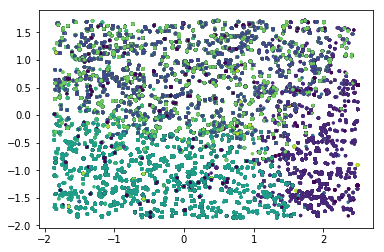

0 77597
1 68711
2 31551
3 25830
4 70858
5 2756
6 52803
7 212
8 1
9 67602
{0: array([ 26160,  26161,  26162, ..., 226085, 226453, 226481], dtype=int64),
 1: array([ 70320,  79760,  92242, ..., 397902, 397904, 397905], dtype=int64),
 2: array([   195,    196,    197, ..., 397918, 397919, 397920], dtype=int64),
 3: array([    0,     1,     2, ..., 26157, 26158, 26159], dtype=int64),
 4: array([ 94496,  94497,  94499, ..., 397897, 397898, 397901], dtype=int64),
 5: array([   176,    177,    178, ..., 397451, 397468, 397717], dtype=int64),
 6: array([ 26165,  26184,  26190, ..., 397887, 397895, 397896], dtype=int64),
 7: array([  3606,   3670,   3671,   4206,  10786,  10787,  10788,  10794,
        10795,  10797,  10799,  12321,  12992,  13101,  14708,  16515,
        21714,  24638,  25350,  27338,  32186,  32187,  32188,  32189,
        32730,  32731,  32732,  32792,  32793,  38030,  49733,  50810,
        52374,  52378,  53503,  53504,  53505,  54329,  55522,  56166,
        57505,  61585

In [60]:
import pprint
clusters_kmeans_predict = KMeans(n_clusters=10).fit_predict(X_scaled)
clusters_kmeans = KMeans(n_clusters=10).fit(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],c=clusters_kmeans_predict, s=6)
plt.show()
clusters_kmeans.cluster_centers_
clusters_kmeans.labels_
mydict = {i: np.where(clusters_kmeans.labels_ == i)[0] for i in range(clusters_kmeans.n_clusters)}
for clust_id in mydict:
    print(clust_id, len(mydict[clust_id]))
pprint.pprint(mydict)

In [63]:
ecom_df_dp.loc[3670 ,['StockCode','Description','Quantity','Amount_Spent','Country','year','month']]

StockCode                               22866
Description     HAND WARMER SCOTTY DOG DESIGN
Quantity                                   12
Amount_Spent                             25.2
Country                        United Kingdom
year                                     2010
month                                      12
Name: 3670, dtype: object

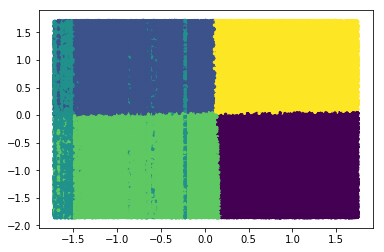

0 86744
1 88335
2 90606
3 33008
4 99228
{0: array([     0,      1,      4, ..., 397897, 397899, 397900], dtype=int64),
 1: array([    10,     11,     19, ..., 397879, 397903, 397904], dtype=int64),
 2: array([     2,      3,      6, ..., 397896, 397898, 397901], dtype=int64),
 3: array([    26,     27,     28, ..., 397918, 397919, 397920], dtype=int64),
 4: array([     9,     12,     13, ..., 397880, 397902, 397905], dtype=int64)}


In [82]:
X = ecom_df_dp_encoding[['CustomerID','Description','Country']]
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
import pprint
clusters_kmeans_predict = KMeans(n_clusters=5).fit_predict(X_scaled)
clusters_kmeans = KMeans(n_clusters=5).fit(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],c=clusters_kmeans_predict, s=6)
plt.show()
clusters_kmeans.cluster_centers_
clusters_kmeans.labels_
mydict = {i: np.where(clusters_kmeans.labels_ == i)[0] for i in range(clusters_kmeans.n_clusters)}
for clust_id in mydict:
    print(clust_id, len(mydict[clust_id]))
pprint.pprint(mydict)

In [64]:
ecom_df_dp.loc[9 ,['Description','Country']]

Description    ASSORTED COLOUR BIRD ORNAMENT
Country                       United Kingdom
Name: 9, dtype: object

In [65]:
ecom_df.CustomerID.nunique()

4372

In [66]:
ecom_df_temp=ecom_df.copy()

In [67]:
ecom_df_temp.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [68]:
ecom_df_temp['InvoiceDate']=pd.to_datetime(ecom_df_temp.InvoiceDate,format='%m/%d/%Y %H:%M')

In [69]:
ecom_df_temp.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [70]:
ecom_df_temp_info=pd.DataFrame(ecom_df_temp.dtypes).T.rename(index={0:'Type'})
ecom_df_temp_info=ecom_df_temp_info.append(pd.DataFrame(ecom_df_temp.isnull().sum()).T.rename(index={0:'Missing Values'}))
ecom_df_temp_info=ecom_df_temp_info.append(pd.DataFrame(ecom_df_temp.isnull().sum()/ecom_df_temp.shape[0]*100).T.rename(index={0:'null values (%)'}))
display(ecom_df_temp_info)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Type,object,object,object,int64,datetime64[ns],float64,float64,object
Missing Values,0,0,1454,0,0,0,135080,0
null values (%),0,0,0.268311,0,0,0,24.9267,0


In [71]:
ecom_df_temp.dropna(axis = 0, subset = ['CustomerID'], inplace = True)

In [72]:
ecom_df_temp.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [73]:
ecom_df_temp.duplicated().sum()

5225

In [74]:
ecom_df_temp.drop_duplicates(inplace=True)

In [75]:
ecom_df_temp.duplicated().sum()

0

In [76]:
ecom_df_temp.shape

(401604, 8)

In [77]:
ecom_df_temp.Country.value_counts()

United Kingdom          356728
Germany                   9480
France                    8475
EIRE                      7475
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1471
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     247
Unspecified                241
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [78]:
uniq_count_temp=pd.DataFrame([{'Country':ecom_df_temp.Country.nunique(),
                             'Products':ecom_df_temp.Description.nunique(),
                             'Customers':ecom_df_temp.CustomerID.nunique(),'Transactions':ecom_df_temp.InvoiceNo.nunique()}])
uniq_count_temp

,Country,Customers,Products,Transactions
0,37,4372,3896,22190


In [200]:
ecom_df_temp.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount_Spent,YearMonth,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,201012,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,201012,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,201012,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,201012,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,201012,2010-12-01


In [79]:
ecom_df_temp['CustomerID'] = ecom_df_temp['CustomerID'].astype('int64')

In [80]:
tot_transac_per_cust = ecom_df_temp.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

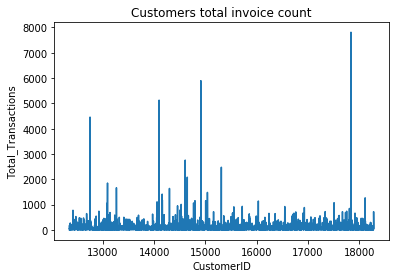

In [81]:
#plot Customer ID and total transactions
import matplotlib.pyplot as plt
#orders.sort_values(['InvoiceNo'], ascending=[False])
plt.plot(tot_transac_per_cust.CustomerID, tot_transac_per_cust.InvoiceNo)
plt.xlabel('CustomerID')
plt.ylabel('Total_Transactions')
plt.title('Customer''s total invoice count')
plt.show()

In [82]:
top15_cust=tot_transac_per_cust.sort_values(by='InvoiceNo', ascending=False).head(15)
top15_cust

,CustomerID,Country,InvoiceNo
4050,17841,United Kingdom,7812
1903,14911,EIRE,5898
1308,14096,United Kingdom,5128
338,12748,United Kingdom,4459
1682,14606,United Kingdom,2759
2200,15311,United Kingdom,2478
1711,14646,Netherlands,2085
576,13089,United Kingdom,1853
706,13263,United Kingdom,1667
1455,14298,United Kingdom,1640


In [83]:
ecom_df_temp['Amount_Spent']=ecom_df_temp['Quantity']*ecom_df_temp['UnitPrice']
ecom_df_temp

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount_Spent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08


In [84]:
tot_transac_per_date = ecom_df_temp.groupby(by=['CustomerID','InvoiceDate'], as_index=False)['InvoiceNo'].count()

In [85]:
ecom_df_temp['YearMonth'] = ecom_df_temp['InvoiceDate'].apply(lambda x:x.strftime('%Y%m'))

In [86]:
ecom_df_temp.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount_Spent,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.3,201012


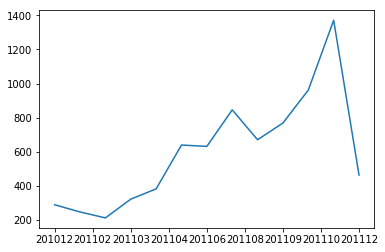

In [87]:
from matplotlib.ticker import MaxNLocator, MultipleLocator
top1_cust=ecom_df_temp[ecom_df_temp['CustomerID']==17841]
tot_trans_topcust=top1_cust.groupby(by=['CustomerID','YearMonth'], as_index=False)['InvoiceNo'].count()
plt.plot(tot_trans_topcust.YearMonth, tot_trans_topcust.InvoiceNo)
plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
plt.show()

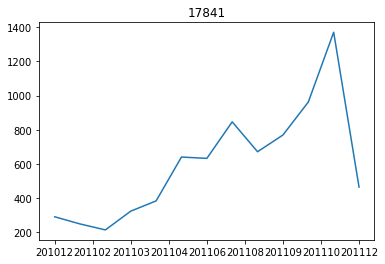

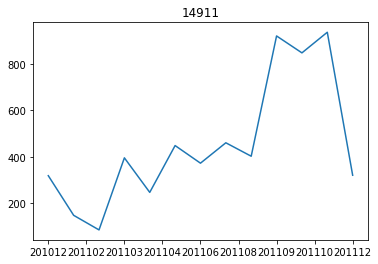

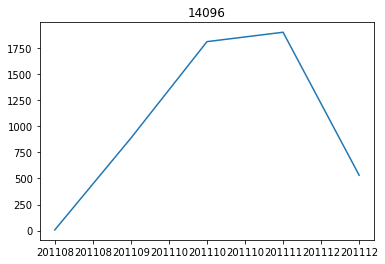

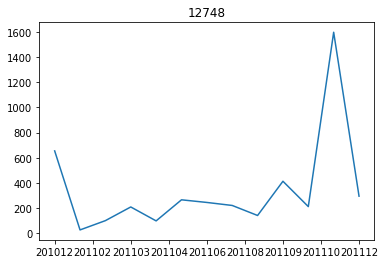

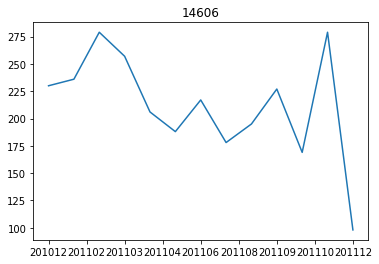

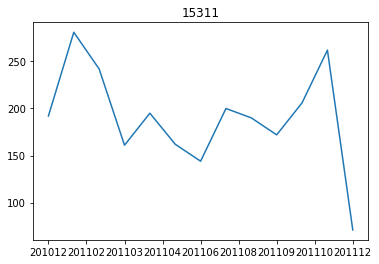

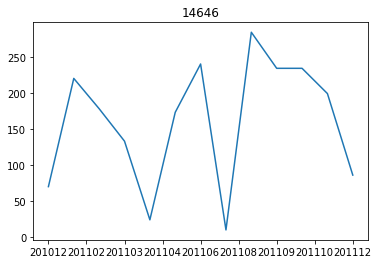

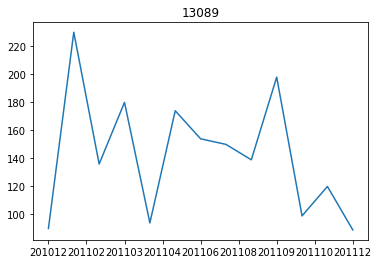

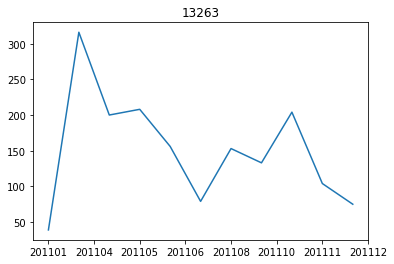

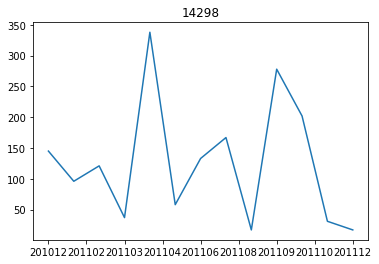

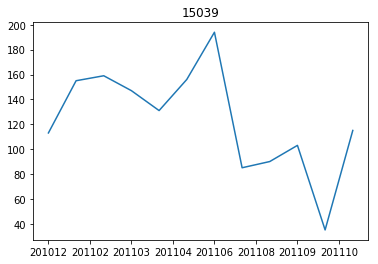

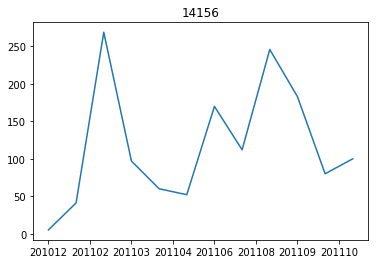

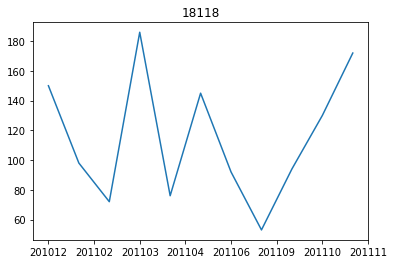

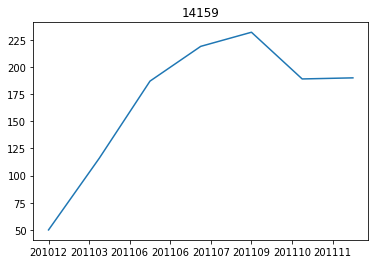

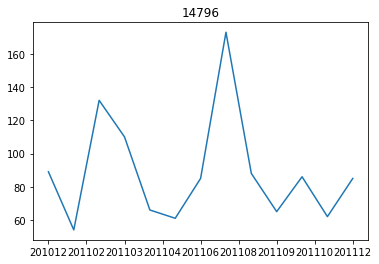

In [88]:
top15custlist=top15_cust['CustomerID']
plt.figure()
for i in top15custlist:
    temp=ecom_df_temp[ecom_df_temp['CustomerID']==i]
    tot_trans_top15cust=temp.groupby(by=['CustomerID','YearMonth'], as_index=False)['InvoiceNo'].count()
    plt.plot(tot_trans_top15cust.YearMonth, tot_trans_top15cust.InvoiceNo)
    plt.title(i)
    plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
    plt.show()

In [89]:
roc_tottransaction=top1_cust.groupby(by=['CustomerID','YearMonth'], as_index=False)['InvoiceNo'].count()

In [90]:
tot_transac_per_date.rename(index=str, columns={"InvoiceDate": "TransactionCount"}).head()

,CustomerID,TransactionCount,InvoiceNo
0,12346,2011-01-18 10:01:00,1
1,12346,2011-01-18 10:17:00,1
2,12347,2010-12-07 14:57:00,31
3,12347,2011-01-26 14:30:00,29
4,12347,2011-04-07 10:43:00,24


In [91]:
tot_transac_per_date['roc'] = tot_transac_per_date.groupby('CustomerID')['InvoiceNo'].pct_change() + 1

In [92]:
tot_transac_per_date['roc'] = tot_transac_per_date.groupby('CustomerID')['InvoiceNo'].apply(lambda x: x/x.shift(1))

In [93]:
tot_transac_per_date.head(20)

,CustomerID,InvoiceDate,InvoiceNo,roc
0,12346,2011-01-18 10:01:00,1,NaN
1,12346,2011-01-18 10:17:00,1,1.000000
2,12347,2010-12-07 14:57:00,31,NaN
3,12347,2011-01-26 14:30:00,29,0.935484
4,12347,2011-04-07 10:43:00,24,0.827586
5,12347,2011-06-09 13:01:00,18,0.750000
6,12347,2011-08-02 08:48:00,22,1.222222
7,12347,2011-10-31 12:25:00,47,2.136364
8,12347,2011-12-07 15:52:00,11,0.234043
9,12348,2010-12-16 19:09:00,17,NaN


In [94]:
tot_transac_per_date.sort_values('CustomerID').head()

,CustomerID,InvoiceDate,InvoiceNo,roc
0,12346,2011-01-18 10:01:00,1,NaN
1,12346,2011-01-18 10:17:00,1,1.000000
2,12347,2010-12-07 14:57:00,31,NaN
3,12347,2011-01-26 14:30:00,29,0.935484
4,12347,2011-04-07 10:43:00,24,0.827586


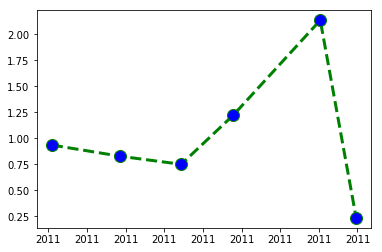

In [95]:
temp_check=tot_transac_per_date[tot_transac_per_date['CustomerID']==12347]
plt.plot(temp_check.InvoiceDate,temp_check.roc,color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12)
plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
plt.show()

<b> COHORT ANALYSIS </b>

In [96]:
cohort_df = ecom_df_temp.copy()

In [97]:
cohort_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount_Spent,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,201012


In [98]:
#Adding invoice period with yyyy-mm
cohort_df['Invoice_period'] = cohort_df.InvoiceDate.apply(lambda x: x.strftime('%Y-%m'))
cohort_df['Invoice_date'] = [d.date() for d in cohort_df['InvoiceDate']]
cohort_df['Invoice_time'] = [d.time() for d in cohort_df['InvoiceDate']]

cohort_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount_Spent,YearMonth,Invoice_period,Invoice_date,Invoice_time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,201012,2010-12,2010-12-01,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,201012,2010-12,2010-12-01,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,201012,2010-12,2010-12-01,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,201012,2010-12,2010-12-01,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,201012,2010-12,2010-12-01,08:26:00


In [99]:
#Determining customer's cohort group based on first order
cohort_df.set_index('CustomerID', inplace=True)

cohort_df['CohortGroup'] = cohort_df.groupby(level=0)['Invoice_date'].min().apply(lambda x: x.strftime('%Y-%m'))
cohort_df.reset_index(inplace=True)
cohort_df.head()

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Amount_Spent,YearMonth,Invoice_period,Invoice_date,Invoice_time,CohortGroup
0,17850,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,201012,2010-12,2010-12-01,08:26:00,2010-12
1,17850,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,201012,2010-12,2010-12-01,08:26:00,2010-12
2,17850,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,201012,2010-12,2010-12-01,08:26:00,2010-12
3,17850,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,201012,2010-12,2010-12-01,08:26:00,2010-12
4,17850,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,201012,2010-12,2010-12-01,08:26:00,2010-12


In [100]:
grouped = cohort_df.groupby(['CohortGroup', 'Invoice_period'])

# count the unique customers, transactions, and total amount spent + Period
cohorts = grouped.agg({'CustomerID': pd.Series.nunique,
                       'InvoiceNo': pd.Series.nunique,
                       'Amount_Spent': np.sum})

#renaming new columns
cohorts.rename(columns={'CustomerID': 'Total_Customers',
                        'InvoiceNo': 'ITransaction_count'}, inplace=True)
cohorts

Total_Customers  ITransaction_count  Amount_Spent
CohortGroup Invoice_period                                                   
2010-12     2010-12                     948                1708    552372.860
            2011-01                     362                 689    271081.050
            2011-02                     317                 579    230416.170
            2011-03                     367                 753    301779.440
            2011-04                     341                 611    200555.550
            2011-05                     376                 801    321097.900
            2011-06                     360                 736    312399.910
            2011-07                     336                 691    303427.420
            2011-08                     336                 661    310117.670
            2011-09                     374                 798    465596.610
            2011-10                     354                 762    440585.730
            2011-11                     474                1135    509481.220
            2011-12                     260                 395    182372.790
2011-01     2011-01                     421                 547    202650.850
            2011-02                     101                 149     56012.500
            2011-03                     119                 182     62153.720
            2011-04                     102                 151     41454.860
            2011-05                     138                 233     82188.990
            2011-06                     126                 196     83890.330
            2011-07                     110                 178     70184.450
            2011-08                     108                 172     72719.780
            2011-09                     131                 189     74270.661
            2011-10                     146                 235    103747.960
            2011-11                     155                 282    121445.260
            2011-12                      63                  89     27773.720
2011-02     2011-02                     380                 474    149105.400
            2011-03                      94                 136     25154.660
            2011-04                      73                 113     37286.340
            2011-05                     106                 162     45768.870
            2011-06                     102                 141     35607.950
...                                     ...                 ...           ...
2011-05     2011-11                      74                 113     31260.280
            2011-12                      29                  37     10561.720
2011-06     2011-06                     235                 298     92198.360
            2011-07                      49                  71     13552.690
            2011-08                      44                  58     13842.420
            2011-09                      64                  91     29868.800
            2011-10                      58                  79     25751.100
            2011-11                      79                 129     39494.480
            2011-12                      24                  30      7841.480
2011-07     2011-07                     191                 235     65734.521
            2011-08                      40                  50     11126.270
            2011-09                      39                  59     15349.900
            2011-10                      44                  57     17062.970
            2011-11                      52                  84     18973.770
            2011-12                      22                  25      6024.700
2011-08     2011-08                     167                 203     77503.270
            2011-09                      42                  59     19093.330
            2011-10                      42                  70     33016.140
            2011-11                      42       

In [101]:
def cohort_period(cohort_df):

    cohort_df['CohortPeriod'] = np.arange(len(cohort_df)) + 1
    return cohort_df

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head(50)

Total_Customers  ITransaction_count  Amount_Spent  \
CohortGroup Invoice_period                                                      
2010-12     2010-12                     948                1708    552372.860   
            2011-01                     362                 689    271081.050   
            2011-02                     317                 579    230416.170   
            2011-03                     367                 753    301779.440   
            2011-04                     341                 611    200555.550   
            2011-05                     376                 801    321097.900   
            2011-06                     360                 736    312399.910   
            2011-07                     336                 691    303427.420   
            2011-08                     336                 661    310117.670   
            2011-09                     374                 798    465596.610   
            2011-10                     354                 762    440585.730   
            2011-11                     474                1135    509481.220   
            2011-12                     260                 395    182372.790   
2011-01     2011-01                     421                 547    202650.850   
            2011-02                     101                 149     56012.500   
            2011-03                     119                 182     62153.720   
            2011-04                     102                 151     41454.860   
            2011-05                     138                 233     82188.990   
            2011-06                     126                 196     83890.330   
            2011-07                     110                 178     70184.450   
            2011-08                     108                 172     72719.780   
            2011-09                     131                 189     74270.661   
            2011-10                     146                 235    103747.960   
            2011-11                     155                 282    121445.260   
            2011-12                      63                  89     27773.720   
2011-02     2011-02                     380                 474    149105.400   
            2011-03                      94                 136     25154.660   
            2011-04                      73                 113     37286.340   
            2011-05                     106                 162     45768.870   
            2011-06                     102                 141     35607.950   
            2011-07                      94                 134     31016.130   
            2011-08                      97                 124     47632.400   
            2011-09                     107                 164     55682.100   
            2011-10                      98                 136     51735.580   
            2011-11                     119                 187     60424.270   
            2011-12                      35                  40      9402.070   
2011-03     2011-03                     440                 548    189488.390   
            2011-04                      84                 123     26364.110   
            2011-05                     112                 178     53594.850   
            2011-06                      96                 150     40246.520   
            2011-07                     102                 142     46495.080   
            2011-08                      78                 123     38301.880   
            2011-09                     116                 159     60526.940   
            2011-10                     105                 161     61205.200   
            2011-11                     127                 222     64885.660   
            2011-12                      39                  48     11145.360   
2011-04     2011-04                     299                 386    119561.811   
            2011-05                      68                

In [102]:
# reindex the DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)

# create a Series holding the total size of each CohortGroup
cohort_group_size = cohorts['Total_Customers'].groupby(level=0).first()
cohort_group_size.head(100)

CohortGroup
2010-12    948
2011-01    421
2011-02    380
2011-03    440
2011-04    299
2011-05    279
2011-06    235
2011-07    191
2011-08    167
2011-09    298
2011-10    352
2011-11    321
2011-12     41
Name: Total_Customers, dtype: int64

In [103]:
cohorts['Total_Customers'].unstack(0).head()

CohortGroup,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
CohortPeriod,,,,,,,,,,,,,
1,948.0,421.0,380.0,440.0,299.0,279.0,235.0,191.0,167.0,298.0,352.0,321.0,41.0
2,362.0,101.0,94.0,84.0,68.0,66.0,49.0,40.0,42.0,89.0,93.0,43.0,NaN
3,317.0,119.0,73.0,112.0,66.0,48.0,44.0,39.0,42.0,97.0,46.0,NaN,NaN
4,367.0,102.0,106.0,96.0,63.0,48.0,64.0,44.0,42.0,36.0,NaN,NaN,NaN
5,341.0,138.0,102.0,102.0,62.0,60.0,58.0,52.0,23.0,NaN,NaN,NaN,NaN


In [104]:
customer_retention = cohorts['Total_Customers'].unstack(0).divide(cohort_group_size, axis=1)
customer_retention.head(10)

CohortGroup,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
CohortPeriod,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2,0.381857,0.239905,0.247368,0.190909,0.227425,0.236559,0.208511,0.209424,0.251497,0.298658,0.264205,0.133956,NaN
3,0.334388,0.282660,0.192105,0.254545,0.220736,0.172043,0.187234,0.204188,0.251497,0.325503,0.130682,NaN,NaN
4,0.387131,0.242280,0.278947,0.218182,0.210702,0.172043,0.272340,0.230366,0.251497,0.120805,NaN,NaN,NaN
5,0.359705,0.327791,0.268421,0.231818,0.207358,0.215054,0.246809,0.272251,0.137725,NaN,NaN,NaN,NaN
6,0.396624,0.299287,0.247368,0.177273,0.237458,0.243728,0.336170,0.115183,NaN,NaN,NaN,NaN,NaN
7,0.379747,0.261283,0.255263,0.263636,0.230769,0.265233,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
8,0.354430,0.256532,0.281579,0.238636,0.260870,0.103943,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.354430,0.311164,0.257895,0.288636,0.083612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


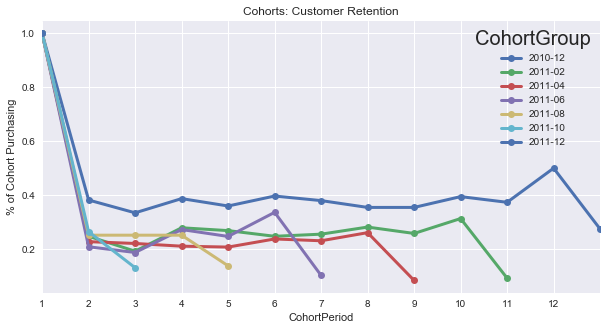

In [205]:
#customer_retention[['2010-12','2011-01','2011-02','2011-03','2011-04','2011-05','2011-06', '2011-07','2011-08','2011-09','2011-10','2011-11','2011-12']].plot(figsize=(10,5),linestyle ='', 
         #marker='o',  markersize=7)
import matplotlib
from matplotlib.font_manager import FontProperties

font = {'family' : 'sans-serif',
        'size'   : 20}
matplotlib.rc('font', **font)
customer_retention[['2010-12','2011-02','2011-04','2011-06', '2011-08','2011-10','2011-12']].plot(figsize=(10,5),linewidth = 3, marker='o',markersize=7)
plt.title('Cohorts: Customer Retention')
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 13)
plt.ylabel('% of Cohort Purchasing');

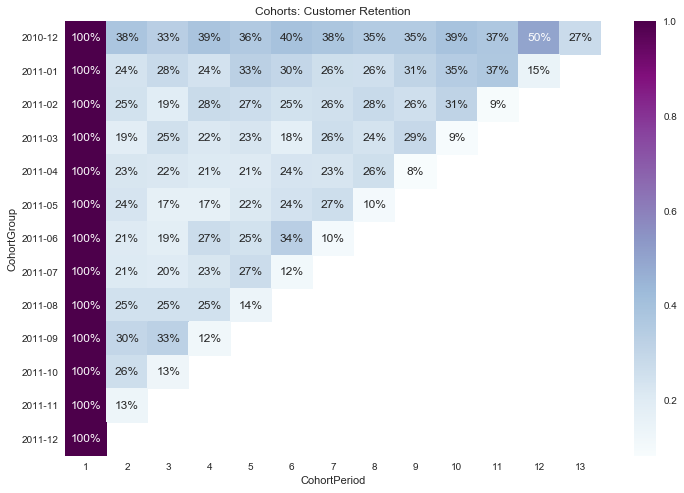

In [106]:
import matplotlib
from matplotlib.font_manager import FontProperties

font = {'family' : 'sans-serif',
        'size'   : 20}
matplotlib.rc('font', **font)
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: Customer Retention')
sns.heatmap(customer_retention.T,mask=customer_retention.T.isnull(),annot=True,fmt='.0%',cmap="BuPu");

In [107]:
cohort_group_size_amount = cohorts['Amount_Spent'].groupby(level=0).first()
cohort_group_size_amount.head(100)

CohortGroup
2010-12    552372.860
2011-01    202650.850
2011-02    149105.400
2011-03    189488.390
2011-04    119561.811
2011-05    115494.260
2011-06     92198.360
2011-07     65734.521
2011-08     77503.270
2011-09    152935.381
2011-10    153634.120
2011-11    132770.590
2011-12     26722.750
Name: Amount_Spent, dtype: float64

In [108]:
cohorts['Amount_Spent'].unstack(0).head(20)

CohortGroup,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
CohortPeriod,,,,,,,,,,,,,
1,552372.86,202650.850,149105.40,189488.39,119561.811,115494.26,92198.36,65734.521,77503.27,152935.381,153634.12,132770.59,26722.75
2,271081.05,56012.500,25154.66,26364.11,28866.800,17622.89,13552.69,11126.270,19093.33,25656.570,38874.64,14786.26,NaN
3,230416.17,62153.720,37286.34,53594.85,24896.560,18838.63,13842.42,15349.900,33016.14,35663.220,12225.64,NaN,NaN
4,301779.44,41454.860,45768.87,40246.52,23863.400,17888.89,29868.80,17062.970,39870.90,12265.810,NaN,NaN,NaN
5,200555.55,82188.990,35607.95,46495.08,25945.510,26482.28,25751.10,18973.770,14143.23,NaN,NaN,NaN,NaN
6,321097.90,83890.330,31016.13,38301.88,29550.230,32850.26,39494.48,6024.700,NaN,NaN,NaN,NaN,NaN
7,312399.91,70184.450,47632.40,60526.94,28060.750,31260.28,7841.48,NaN,NaN,NaN,NaN,NaN,NaN
8,303427.42,72719.780,55682.10,61205.20,33670.780,10561.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,310117.67,74270.661,51735.58,64885.66,6273.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
revenue_retention = cohorts['Amount_Spent'].unstack(0).divide(cohort_group_size_amount, axis=1)
revenue_retention.head(10)

CohortGroup,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
CohortPeriod,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2,0.490757,0.276399,0.168704,0.139133,0.241438,0.152587,0.146995,0.169261,0.246355,0.167761,0.253034,0.111367,NaN
3,0.417139,0.306703,0.250067,0.282840,0.208232,0.163113,0.150137,0.233514,0.425997,0.233191,0.079576,NaN,NaN
4,0.546333,0.204563,0.306956,0.212396,0.199590,0.154890,0.323962,0.259574,0.514442,0.080203,NaN,NaN,NaN
5,0.363080,0.405569,0.238811,0.245372,0.217005,0.229295,0.279301,0.288642,0.182486,NaN,NaN,NaN,NaN
6,0.581306,0.413965,0.208015,0.202133,0.247154,0.284432,0.428364,0.091652,NaN,NaN,NaN,NaN,NaN
7,0.565560,0.346332,0.319455,0.319423,0.234697,0.270665,0.085050,NaN,NaN,NaN,NaN,NaN,NaN
8,0.549316,0.358843,0.373441,0.323002,0.281618,0.091448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.561428,0.366496,0.346973,0.342426,0.052474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


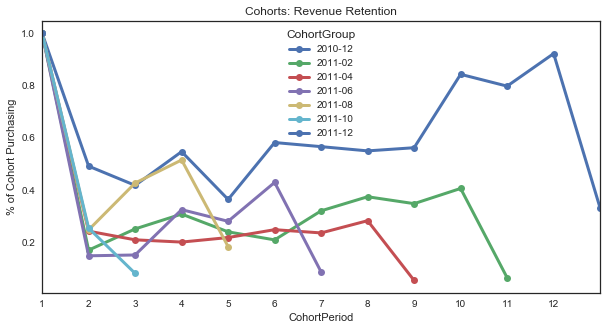

In [110]:
revenue_retention[['2010-12','2011-02','2011-04','2011-06', '2011-08','2011-10','2011-12']].plot(figsize=(10,5),linewidth = 3, marker='o',markersize=7)
plt.title('Cohorts: Revenue Retention')
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 13)
plt.ylabel('% of Cohort Purchasing');

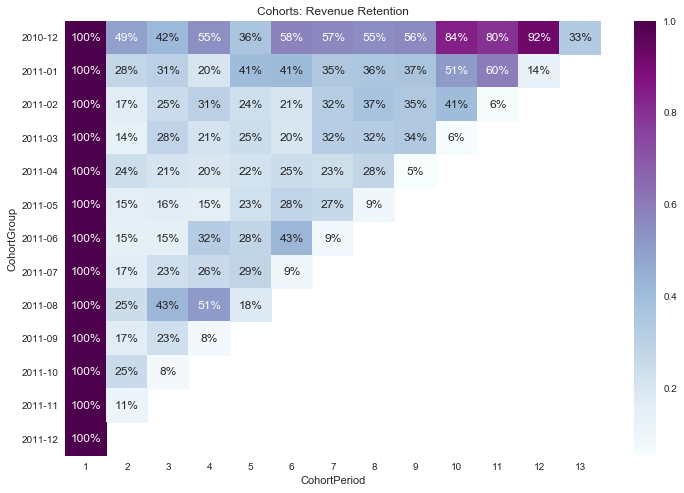

In [111]:
plt.figure(figsize=(12, 8))
plt.title('Cohorts: Revenue Retention')
sns.heatmap(revenue_retention.T,mask=revenue_retention.T.isnull(),annot=True,fmt='.0%',cmap="BuPu");

In [112]:
ecom_df_temp.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount_Spent,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,201012


In [113]:
end_date = ecom_df_temp['InvoiceDate'].max().date()

first_purchase = pd.DataFrame(ecom_df_temp.groupby(by=['CustomerID'])['InvoiceDate'].min())

last_purchase  = pd.DataFrame(ecom_df_temp.groupby(by=['CustomerID'])['InvoiceDate'].max())

end_first_diff= first_purchase.applymap(lambda x:(end_date - x.date()).days)
end_last_diff = last_purchase.applymap(lambda x:(end_date - x.date()).days)

In [114]:
final_data=pd.DataFrame(ecom_df_temp.groupby(by=['CustomerID'])['Amount_Spent'].sum())
final_data.head()

,Amount_Spent
CustomerID,
12346,0.00
12347,4310.00
12348,1797.24
12349,1757.55
12350,334.40


In [115]:
final_data['DaySinceFirstPurchase'] = end_first_diff
final_data['DaySinceLastPurchase'] = end_last_diff

In [116]:
final_data.head(10)

,Amount_Spent,DaySinceFirstPurchase,DaySinceLastPurchase
CustomerID,,,
12346,0.00,325,325
12347,4310.00,367,2
12348,1797.24,358,75
12349,1757.55,18,18
12350,334.40,310,310
12352,1545.41,296,36
12353,89.00,204,204
12354,1079.40,232,232
12355,459.40,214,214


In [117]:
ecom_df_temp['Date'] = ecom_df_temp['InvoiceDate'].dt.date

In [118]:
ActiveDays= ecom_df_temp.groupby(by=['CustomerID'])['Date'].nunique()

In [119]:
final_data['ActiveDays']=ActiveDays
final_data.head()

,Amount_Spent,DaySinceFirstPurchase,DaySinceLastPurchase,ActiveDays
CustomerID,,,,
12346,0.00,325,325,1
12347,4310.00,367,2,7
12348,1797.24,358,75,4
12349,1757.55,18,18,1
12350,334.40,310,310,1


In [120]:
ecom_df_temp.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount_Spent,YearMonth,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,201012,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,201012,2010-12-01


In [121]:
transaction_count = ecom_df_temp.groupby(by=['CustomerID','YearMonth'], as_index=True)['InvoiceNo'].count()
transaction_count.head(10)

CustomerID  YearMonth
12346       201101        2
12347       201012       31
            201101       29
            201104       24
            201106       18
            201108       22
            201110       47
            201112       11
12348       201012       17
            201101        6
Name: InvoiceNo, dtype: int64

In [122]:
AllYearMonths = [201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112]
YearMonthDict = {}
for index, row in transaction_count.iteritems():
    YearMonthDict[index] = row

MainList = []
for cust in ecom_df_temp['CustomerID'].unique():    
    for item in AllYearMonths:
        MyKey = (cust, str(item))
        if (MyKey not in YearMonthDict):
            MainList.append([cust, item, 0])
        else:
            MainList.append([cust, item, YearMonthDict[MyKey]])
transaction_per_month_mean =pd.DataFrame(MainList,columns=['CustomerID','YearMonth','Count'])
transaction_per_month_mean.head()

,CustomerID,YearMonth,Count
0,17850,201012,297
1,17850,201101,0
2,17850,201102,12
3,17850,201103,0
4,17850,201104,0


In [123]:
#transaction_count.rename(columns={'InvoiceNo': 'TransactionCountPerMonth'}, inplace=True)

In [124]:
#transaction_count.head(2)

In [125]:
transaction_per_month_mean['Count']=transaction_per_month_mean['Count'].div(30)
transaction_per_month_mean.head(5)

,CustomerID,YearMonth,Count
0,17850,201012,9.9
1,17850,201101,0.0
2,17850,201102,0.4
3,17850,201103,0.0
4,17850,201104,0.0


In [126]:
transaction_per_month_mean = transaction_per_month_mean.groupby(by=['CustomerID'], as_index=False)['Count'].mean()
transaction_per_month_mean.head()

,CustomerID,Count
0,12346,0.005128
1,12347,0.466667
2,12348,0.079487
3,12349,0.187179
4,12350,0.043590


In [127]:
final_data['TransactionRate']=transaction_per_month_mean['Count'].values

In [128]:
ecom_df_temp.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount_Spent,YearMonth,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,201012,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,201012,2010-12-01


In [129]:
Prod_category1 = [] #quantitites sold of products in category 1 is >10000
Prod_category2 = [] #quantitites sold of products in category 1 is in between 10000 and 2000
Prod_category3 = [] #quantitites sold of products in category 1 is <2000

QuantityPerProduct=ecom_df_temp.groupby(by=['StockCode'], as_index=True)['Quantity'].sum()
for index, row in QuantityPerProduct.iteritems():
    if row>10000:
        Prod_category1.append(index)
    elif row>2000:
        Prod_category2.append(index)
    else:
        Prod_category3.append(index)
print(len(Prod_category1))
print(len(Prod_category2))
print(len(Prod_category3))

70
576
3038


In [130]:
CustomerProductTemp=ecom_df_temp.groupby(by=['CustomerID','StockCode'],as_index=True)['Quantity'].sum()
CustomerProductTemp.head(10)

CustomerID  StockCode
12346       23166         0
12347       16008        24
            17021        36
            20665         6
            20719        40
            20780        12
            20782         6
            20966        10
            21035         6
            21041        12
Name: Quantity, dtype: int64

In [131]:
Cust_prod_categories = {}
for index, row in CustomerProductTemp.iteritems():
    cust = index[0]
    prod = index[1]
    if cust in Cust_prod_categories:
        cust_prod_1 = Cust_prod_categories[cust][0]
        cust_prod_2 = Cust_prod_categories[cust][1]
        cust_prod_3 = Cust_prod_categories[cust][2]
    else:
        cust_prod_1 = 0
        cust_prod_2 = 0
        cust_prod_3 = 0
    if prod in Prod_category1:
        cust_prod_1 += row
    elif prod in Prod_category2:
        cust_prod_2 += row
    else:
        cust_prod_3 += row
    Cust_prod_categories[cust] = (cust_prod_1, cust_prod_2, cust_prod_3)
print(Cust_prod_categories)

{12346: (0, 0, 0), 12347: (471, 1082, 905), 12348: (720, 1477, 144), 12349: (13, 432, 186), 12350: (12, 73, 112), 12352: (47, 219, 204), 12353: (0, 0, 20), 12354: (78, 323, 129), 12355: (26, 174, 40), 12356: (373, 461, 757), 12357: (104, 1035, 1569), 12358: (0, 128, 120), 12359: (238, 594, 767), 12360: (104, 631, 430), 12361: (34, 57, 0), 12362: (431, 1050, 731), 12363: (156, 164, 88), 12364: (389, 756, 361), 12365: (1, 66, 106), 12367: (24, 123, 26), 12370: (467, 634, 1251), 12371: (24, 218, 349), 12372: (120, 510, 164), 12373: (90, 107, 0), 12374: (26, 152, 164), 12375: (49, 124, 4), 12377: (60, 558, 326), 12378: (490, 1082, 957), 12379: (117, 239, 50), 12380: (364, 482, 280), 12381: (186, 400, 197), 12383: (180, 1064, 285), 12384: (17, 64, 40), 12386: (0, 168, 186), 12388: (223, 711, 528), 12390: (84, 217, 52), 12391: (13, 130, 150), 12393: (262, 284, 270), 12394: (24, 719, 76), 12395: (644, 1157, 312), 12397: (183, 765, 315), 12398: (210, 870, 314), 12399: (488, 566, 124), 12401: (

In [132]:
Cust_prod_categories_df=pd.DataFrame.from_dict(Cust_prod_categories,orient='index')
Cust_prod_categories_df

,0,1,2
12346,0,0,0
12347,471,1082,905
12348,720,1477,144
12349,13,432,186
12350,12,73,112
12352,47,219,204
12353,0,0,20
12354,78,323,129
12355,26,174,40
12356,373,461,757


In [133]:
Cust_prod_categories_df.rename(columns={0: 'Prod_Category1_Qnty',
                        1: 'Prod_Category2_Qnty',2:'Prod_Category3_Qnty'}, inplace=True)
Cust_prod_categories_df.head()

,Prod_Category1_Qnty,Prod_Category2_Qnty,Prod_Category3_Qnty
12346,0,0,0
12347,471,1082,905
12348,720,1477,144
12349,13,432,186
12350,12,73,112


In [134]:
final_data=pd.concat([Cust_prod_categories_df, final_data], axis=1)

In [135]:
final_data.head(10)

,Prod_Category1_Qnty,Prod_Category2_Qnty,Prod_Category3_Qnty,Amount_Spent,DaySinceFirstPurchase,DaySinceLastPurchase,ActiveDays,TransactionRate
CustomerID,,,,,,,,
12346,0,0,0,0.00,325,325,1,0.005128
12347,471,1082,905,4310.00,367,2,7,0.466667
12348,720,1477,144,1797.24,358,75,4,0.079487
12349,13,432,186,1757.55,18,18,1,0.187179
12350,12,73,112,334.40,310,310,1,0.043590
12352,47,219,204,1545.41,296,36,7,0.243590
12353,0,0,20,89.00,204,204,1,0.010256
12354,78,323,129,1079.40,232,232,1,0.148718
12355,26,174,40,459.40,214,214,1,0.033333


In [136]:
final_data.to_csv('final_data.csv')

In [191]:
cluster_df=final_data.copy()
cluster_df.shape

(4372, 8)

In [165]:
columns=['Prod_Category1_Qnty','Prod_Category2_Qnty','Prod_Category3_Qnty','Amount_Spent','DaySinceFirstPurchase','DaySinceLastPurchase','ActiveDays','TransactionRate']
matrix = cluster_df[columns].as_matrix()

C:\Users\laksh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [166]:
scaler = StandardScaler()
scaler.fit(matrix)
scaled_matrix = scaler.transform(matrix)

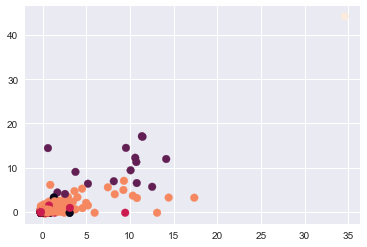

In [149]:
clusters_kmeans = KMeans(n_clusters=5).fit_predict(scaled_matrix)
#score_Kmeans=adjusted_rand_score(clusters_kmeans,y)
plt.scatter(scaled_matrix[:, 0], scaled_matrix[:, 1], c=clusters_kmeans, s=60)
#plt.title("K-Means, Score is %s" %score_Kmeans )
plt.show()

In [150]:
from sklearn.metrics import silhouette_samples, silhouette_score
n_clusters = 4
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
kmeans.fit(scaled_matrix)
clusters_customer = kmeans.predict(scaled_matrix)
silhouette_avg = silhouette_score(scaled_matrix, clusters_customer)
print('silhouette score: {:<.3f}'.format(silhouette_avg))

silhouette score: 0.433


In [151]:
pd.DataFrame(pd.Series(clusters_customer).value_counts(), columns = ['No of customers in each clusters']).T

,2,0,3,1
No of customers in each clusters,1683,1608,1066,15


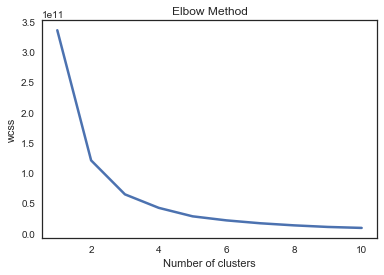

In [154]:
#to find best no. of cluster value for knn
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(cluster_df)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

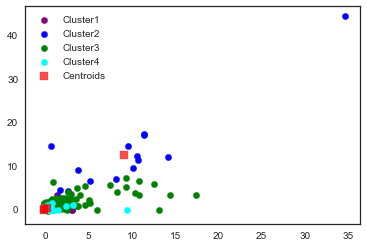

In [155]:
##Fitting kmeans to the dataset with k=4
km=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(scaled_matrix)
#Visualizing the clusters for k=4
plt.scatter(scaled_matrix[y_means==0,0],scaled_matrix[y_means==0,1],s=40, c='purple',label='Cluster1')
plt.scatter(scaled_matrix[y_means==1,0],scaled_matrix[y_means==1,1],s=40, c='blue',label='Cluster2')
plt.scatter(scaled_matrix[y_means==2,0],scaled_matrix[y_means==2,1],s=40, c='green',label='Cluster3')
plt.scatter(scaled_matrix[y_means==3,0],scaled_matrix[y_means==3,1],s=40, c='cyan',label='Cluster4')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],s=50,marker='s', c='red', alpha=0.7, label='Centroids')
plt.legend()
plt.show()

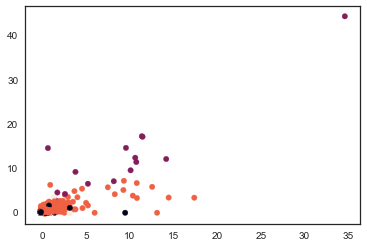

,0,2,3,1
No of customers in each clusters,1687,1604,1066,15


In [157]:
import pprint
clusters_kmeans_predict = KMeans(n_clusters=4).fit_predict(scaled_matrix)
clusters_kmeans = KMeans(n_clusters=4).fit(scaled_matrix)
plt.scatter(scaled_matrix[:, 0], scaled_matrix[:, 1],c=clusters_kmeans_predict, s=30)
plt.show()
pd.DataFrame(pd.Series(clusters_kmeans_predict).value_counts(), columns = ['No of customers in each clusters']).T

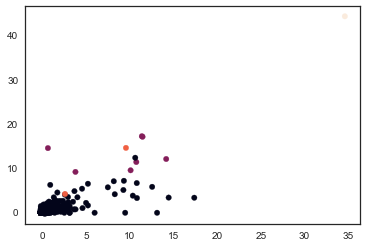

,0,1,2,3
No of customers in each clusters,4362,7,2,1


In [158]:
from sklearn.cluster import AgglomerativeClustering
clusters_Agglomerative = AgglomerativeClustering(n_clusters=4, 
                            linkage='complete').fit_predict(scaled_matrix)

#score assuming we know the label 
#score_Agglomerative=adjusted_rand_score(clusters_Agglomerative,y) 

#plot Hierarchical Clustering 
plt.scatter(scaled_matrix[:, 0], scaled_matrix[:, 1], c=clusters_Agglomerative, s=30)
#plt.title("Agglomerative, complete linkage Score is %s" %score_Agglomerative )
plt.show()
pd.DataFrame(pd.Series(clusters_Agglomerative).value_counts(), columns = ['No of customers in each clusters']).T

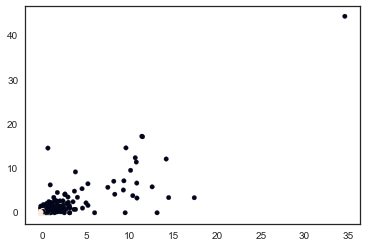

,0,-1
No of customers in each clusters,3898,474


In [159]:
from sklearn.cluster import DBSCAN
clusters_DBSCAN = DBSCAN(eps=0.5, min_samples=10).fit_predict(scaled_matrix)

#score_DBSCAN=adjusted_rand_score(clusters_DBSCAN,y) #score assuming we know the actual label 
plt.figure()
plt.scatter(scaled_matrix[:, 0], scaled_matrix[:, 1], c=clusters_DBSCAN, s=20)
#plt.title("DBSCAN, eps=0.5, min_samples=10, Score is %s" %score_DBSCAN )
plt.show()
pd.DataFrame(pd.Series(clusters_DBSCAN).value_counts(), columns = ['No of customers in each clusters']).T

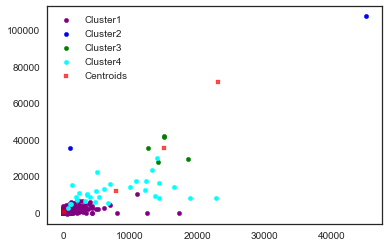

,0,3,2,1
No of customers in each clusters,4335,30,5,2


In [160]:
##Fitting km_notscaledeans to the dataset with k=4
km_notscaled=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km_notscaled.fit_predict(matrix)
#Visualizing the clusters for k=4
plt.scatter(matrix[y_means==0,0],matrix[y_means==0,1],s=20, c='purple',label='Cluster1')
plt.scatter(matrix[y_means==1,0],matrix[y_means==1,1],s=20, c='blue',label='Cluster2')
plt.scatter(matrix[y_means==2,0],matrix[y_means==2,1],s=20, c='green',label='Cluster3')
plt.scatter(matrix[y_means==3,0],matrix[y_means==3,1],s=20, c='cyan',label='Cluster4')
plt.scatter(km_notscaled.cluster_centers_[:,0], km_notscaled.cluster_centers_[:,1],s=10,marker='s', c='red', alpha=0.7, label='Centroids')
plt.legend()
plt.show()
pd.DataFrame(pd.Series(y_means).value_counts(), columns = ['No of customers in each clusters']).T

In [161]:
cluster_df.loc[:, 'cluster'] = clusters_customer
cluster_df.head(2)

,Prod_Category1_Qnty,Prod_Category2_Qnty,Prod_Category3_Qnty,Amount_Spent,DaySinceFirstPurchase,DaySinceLastPurchase,ActiveDays,TransactionRate,cluster
CustomerID,,,,,,,,,
12346,0,0,0,0.0,325,325,1,0.005128,3
12347,471,1082,905,4310.0,367,2,7,0.466667,0


In [171]:
X = cluster_df[columns]
X.info()
Y = cluster_df['cluster']
Y.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4372 entries, 12346 to 18287
Data columns (total 8 columns):
Prod_Category1_Qnty      4372 non-null int64
Prod_Category2_Qnty      4372 non-null int64
Prod_Category3_Qnty      4372 non-null int64
Amount_Spent             4372 non-null float64
DaySinceFirstPurchase    4372 non-null int64
DaySinceLastPurchase     4372 non-null int64
ActiveDays               4372 non-null int64
TransactionRate          4372 non-null float64
dtypes: float64(2), int64(6)
memory usage: 307.4 KB


count    4372.000000
mean        1.504803
std         1.213900
min         0.000000
25%         0.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: cluster, dtype: float64

In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [198]:
from sklearn.linear_model import LogisticRegression
LogRegModel=LogisticRegression(C=1).fit(X_train,Y_train)
accuracy1=LogRegModel.score(X_test,Y_test)
print(forestModel.feature_importances_)
print("Accuracy of the logistic regression model with Ridge and C=1: ",accuracy1)

[0.         0.         0.         0.13110314 0.30616474 0.14838129
 0.33841788 0.07593294]
Accuracy of the logistic regression model with Ridge and C=1:  0.9432753888380604


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn1=KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train,Y_train)
accuracy_k1=knn1.score(X_test,Y_test)
print("Accuracy when k=1: ",accuracy_k1)
knn5=KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train,Y_train)
accuracy_k5=knn5.score(X_test,Y_test)
print("Accuracy when k=5: ",accuracy_k5)
knn10=KNeighborsClassifier(n_neighbors=10)
knn10.fit(X_train,Y_train)
accuracy_k10=knn10.score(X_test,Y_test)
print("Accuracy when k=10: ",accuracy_k10)
knn15=KNeighborsClassifier(n_neighbors=15)
knn15.fit(X_train,Y_train)
accuracy_k15=knn15.score(X_test,Y_test)
print("Accuracy when k=15: ",accuracy_k15)
accuracy_knn = pd.DataFrame({'K_Values':['1','5','10','15'],'Accuracy':[accuracy_k1,accuracy_k5,accuracy_k10,accuracy_k15]})
#Barplot_accuracy =accuracy.plot.bar(x='K_Values', y='Accuracy',rot=0,legend=None)

In [175]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
treeModel=DecisionTreeClassifier(max_depth=2, criterion='gini')
treeModel=treeModel.fit(X_train,Y_train)
accuracy3 = treeModel.score(X_test, Y_test)
print('Accuracy is(Decision Tree)) ', accuracy3)
forestModel= RandomForestClassifier(n_estimators=4, max_features=2,max_depth=2, random_state=0)
forestModel.fit(X_train,Y_train)
accuracy4 = forestModel.score(X_test, Y_test)
print('Accuracy is(RandomForest) ', accuracy4)
BoostModel= AdaBoostClassifier(n_estimators=4,random_state=0)
BoostModel.fit(X_train,Y_train)
accuracy5 = BoostModel.score(X_test, Y_test)
print('Accuracy is(Adaboost) ', accuracy5)
MLPmodel=MLPClassifier(solver='sgd', activation='tanh', random_state=0,hidden_layer_sizes=(10,5), alpha=0.5,max_iter=5000)
MLPmodel.fit(X_train,Y_train)
accuracy6 = MLPmodel.score(X_test, Y_test)
print('Accuracy is(MLP classifier) ', accuracy6)

Accuracy is(Decision Tree))  0.9451052150045746
Accuracy is(RandomForest)  0.8709972552607502
Accuracy is(Adaboost)  0.9240622140896615
Accuracy is(MLP classifier)  0.6129917657822507


In [188]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, precision_score, recall_score
lda = LinearDiscriminantAnalysis().fit(X_train, Y_train)
#Y_predict = lda.predict(X_test)
accuracy_lda = lda.score(X_test, Y_test)
print(accuracy_lda)
#confusion = confusion_matrix(Y_test, Y_predict)
#precision = precision_score(Y_test, Y_predict)
#recall = recall_score(Y_test, Y_predict)

0.9505946935041171


In [187]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis().fit(X_train, Y_train)
#Y_predict = qda.predict(X_test)
accuracy_qda = qda.score(X_test, Y_test)
print(accuracy_qda)

0.8920402561756633


In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
X_trainval, X_test, Y_trainval, Y_test= train_test_split(X, Y, random_state=0)
scaler=preprocessing.StandardScaler().fit(X_trainval)
X_trainval_transformed=scaler.transform(X_trainval) 
X_test_transformed=scaler.transform(X_test) 
kfolds=5
best_score=0
best_parameters=0
for c in [0.01, 0.1, 1, 10, 100]:
    LogRegModel=LogisticRegression(C=c)
    scores=cross_val_score(LogRegModel,X_trainval_transformed,Y_trainval,cv=kfolds)
    score=np.mean(scores)
    if(score>best_score):
        best_score=score
        best_parameters=c
print("The best tuning parameter for this dataset with Ridge is C= ", best_parameters)
LogRegModel=LogisticRegression(C=best_parameters).fit(X_trainval_transformed,Y_trainval)
accuracy2=LogRegModel.score(X_test_transformed,Y_test)
print("The test accuracy of the model with the best tuning parameter is: ",accuracy2)

The best tuning parameter for this dataset with Ridge is C=  10
The test accuracy of the model with the best tuning parameter is:  0.9743824336688015
